In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv('ds_end.csv')
data

,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
0,CS20B1052,M,23,90.32,5.0,3.0,55
1,CS21B1001,F,21,93.65,4.7,3.1,56
2,CS21B1002,M,38,98.41,2.0,7.2,95
3,CS21B1003,M,14,95.24,5.2,2.0,41
4,CS21B1004,M,13,85.71,6.0,1.8,39
...,...,...,...,...,...,...,...
123,CS21B2042,M,32,100.00,2.1,5.9,86
124,CS21B2043,M,32,100.00,2.0,6.5,87
125,CS21B2044,F,26,100.00,3.6,5.6,77
126,CS21B2045,M,30,98.41,2.8,7.0,80


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLL_NO            128 non-null    object 
 1   GENDER             128 non-null    object 
 2   MID_MARKS          128 non-null    int64  
 3   ATTENDANCE         128 non-null    float64
 4   SOCIAL_MEDIA_TIME  126 non-null    float64
 5   STUDY_TIME         125 non-null    float64
 6   END_MARKS          128 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 7.1+ KB


In [8]:
data.tail()

,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
123,CS21B2042,M,32,100.00,2.1,5.9,86
124,CS21B2043,M,32,100.00,2.0,6.5,87
125,CS21B2044,F,26,100.00,3.6,5.6,77
126,CS21B2045,M,30,98.41,2.8,7.0,80
127,CS21B2045,M,30,98.41,4.0,6.0,80


In [9]:
#we are using roll_no as primary key and dropping duplicate entries
#keep specifies which entry has to kept first, last or no entry(FALSE)
data.drop_duplicates(subset='ROLL_NO',keep='first',inplace=True)
data

,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
0,CS20B1052,M,23,90.32,5.0,3.0,55
1,CS21B1001,F,21,93.65,4.7,3.1,56
2,CS21B1002,M,38,98.41,2.0,7.2,95
3,CS21B1003,M,14,95.24,5.2,2.0,41
4,CS21B1004,M,13,85.71,6.0,1.8,39
...,...,...,...,...,...,...,...
122,CS21B2041,M,6,95.24,6.0,2.1,44
123,CS21B2042,M,32,100.00,2.1,5.9,86
124,CS21B2043,M,32,100.00,2.0,6.5,87
125,CS21B2044,F,26,100.00,3.6,5.6,77


In [34]:
data['GENDER']=data['GENDER'].astype('category')
data['GENDER']=data['GENDER'].cat.codes
data

,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
0,CS20B1052,1,23.00,90.32,5.0,3.0,55
1,CS21B1001,0,21.00,93.65,4.7,3.1,56
2,CS21B1002,1,38.00,98.41,2.0,7.2,95
3,CS21B1003,1,14.00,95.24,5.2,2.0,41
4,CS21B1004,1,13.00,85.71,6.0,1.8,39
...,...,...,...,...,...,...,...
122,CS21B2041,1,9.75,95.24,6.0,2.1,44
123,CS21B2042,1,32.00,100.00,2.1,5.9,86
124,CS21B2043,1,32.00,100.00,2.0,6.5,87
125,CS21B2044,0,26.00,100.00,3.6,5.6,77


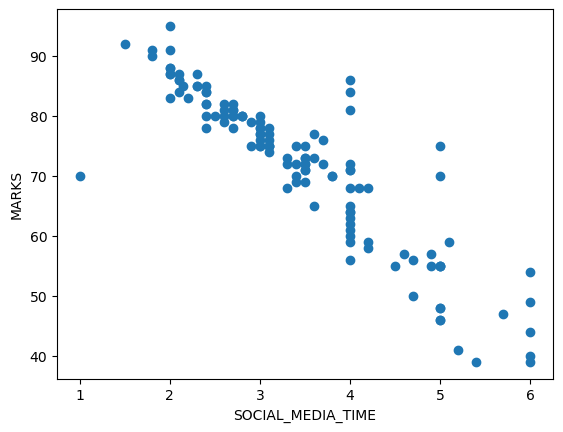

In [11]:
#for som extent this graph shows that social media time and marks are closely related and are linearly separable
plt.scatter(data['SOCIAL_MEDIA_TIME'],data['END_MARKS'])
plt.xlabel('SOCIAL_MEDIA_TIME')
plt.ylabel('MARKS')
plt.show()

In [14]:
#filling null values in social media and study time graphs based on final exam marks he got
data[np.isnan(data['SOCIAL_MEDIA_TIME'])]

,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
20,CS21B1020,1,0,0.00,NaN,NaN,2
92,CS21B2009,1,3,80.95,NaN,NaN,27


In [15]:
#as we see these 2 entries have very low end marks we can fill 7.5 and 6.5 hours by seeing above scatter plot
data.at[20, 'SOCIAL_MEDIA_TIME'] = 7.5
data.at[92, 'SOCIAL_MEDIA_TIME'] = 6.5
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLL_NO            127 non-null    object 
 1   GENDER             127 non-null    int8   
 2   MID_MARKS          127 non-null    int64  
 3   ATTENDANCE         127 non-null    float64
 4   SOCIAL_MEDIA_TIME  127 non-null    float64
 5   STUDY_TIME         124 non-null    float64
 6   END_MARKS          127 non-null    int64  
dtypes: float64(3), int64(2), int8(1), object(1)
memory usage: 11.1+ KB


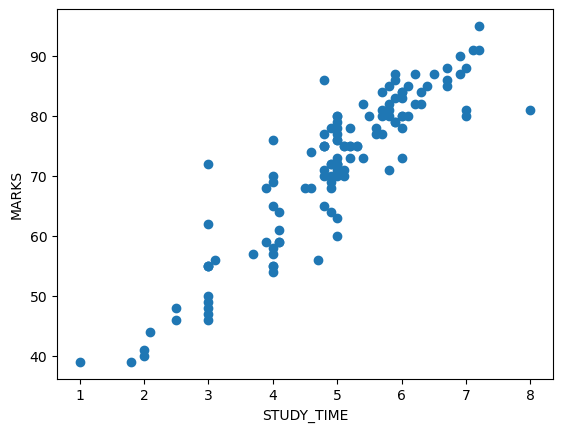

In [16]:
plt.scatter(data['STUDY_TIME'],data['END_MARKS'])
plt.xlabel('STUDY_TIME')
plt.ylabel('MARKS')
plt.show()

In [17]:
data[np.isnan(data['STUDY_TIME'])]

,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
12,CS21B1012,1,37,93.65,1.5,NaN,92
20,CS21B1020,1,0,0.00,7.5,NaN,2
92,CS21B2009,1,3,80.95,6.5,NaN,27


In [18]:
#as we see these last 2 entries have very low end marks we can fill 0.6 and 1 AS study hours and first entry we can
#fill above 7 hours as we can see from scatter plot
data.at[12, 'STUDY_TIME'] = 7.3
data.at[20, 'STUDY_TIME'] = 0.3
data.at[92, 'STUDY_TIME'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLL_NO            127 non-null    object 
 1   GENDER             127 non-null    int8   
 2   MID_MARKS          127 non-null    int64  
 3   ATTENDANCE         127 non-null    float64
 4   SOCIAL_MEDIA_TIME  127 non-null    float64
 5   STUDY_TIME         127 non-null    float64
 6   END_MARKS          127 non-null    int64  
dtypes: float64(3), int64(2), int8(1), object(1)
memory usage: 11.1+ KB


In [35]:
#now we are free of null values
#now we have to check for outliers
x=data.columns

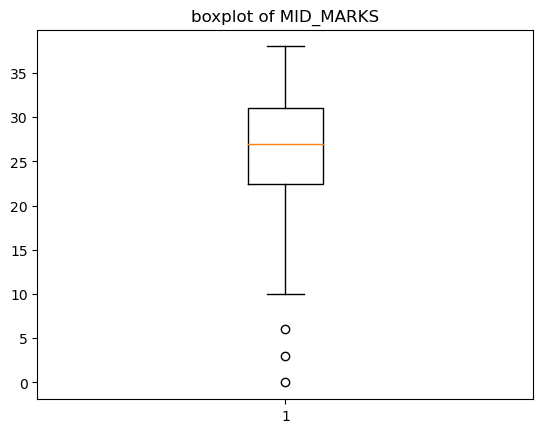

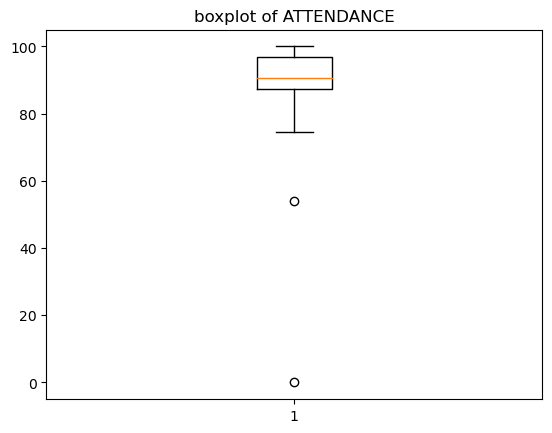

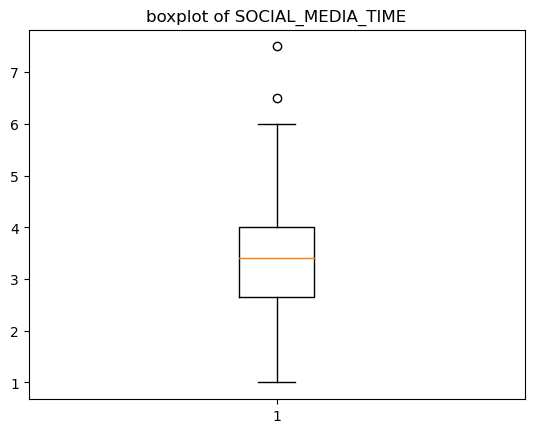

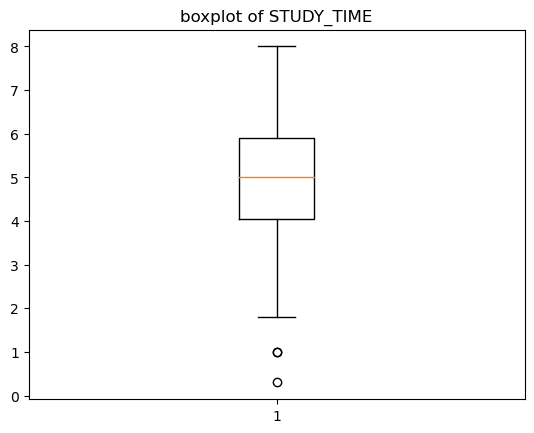

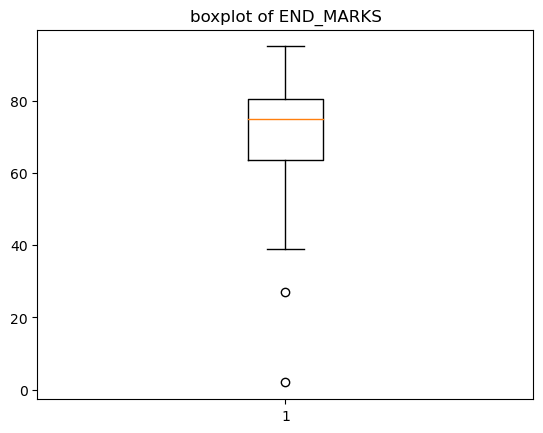

In [20]:
for i in range(2,len(x)):
    plt.boxplot(data[x[i]])
    plt.title(f'boxplot of {x[i]}')
    plt.show()

In [21]:
for i in range(2,len(x)):
    #calculating 25,50,75 percentile for eliminating outliers
    perc=np.percentile(data[x[i]],[25,50,75])
    iqr=perc[2]-perc[0]
    perc[0]=perc[0]-iqr*1.5
    perc[2]=perc[2]+iqr*1.5
    #and replacing values more than range with within range values
    data[x[i]]=data[x[i]].mask(data[x[i]]<perc[0],perc[0])
    data[x[i]]=data[x[i]].mask(data[x[i]]>perc[2],perc[2])

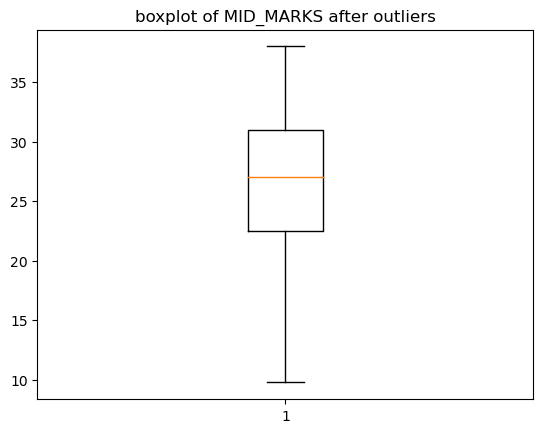

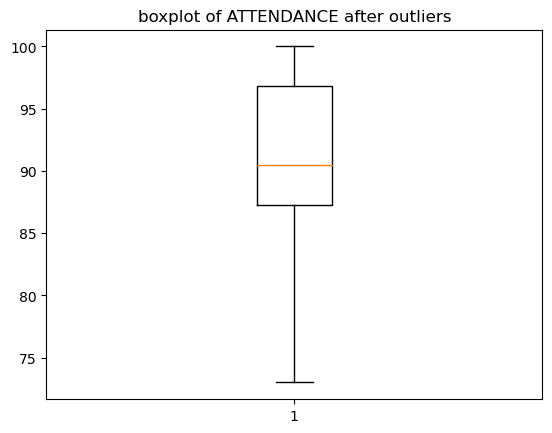

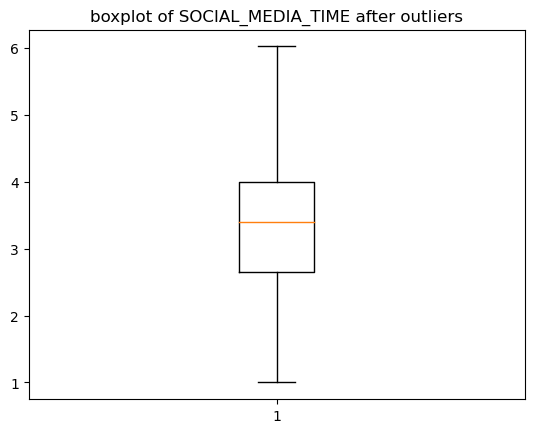

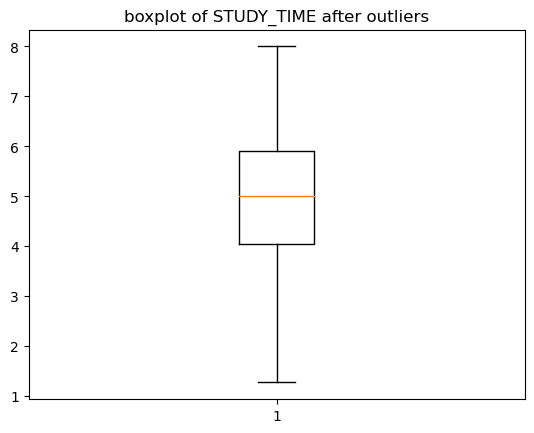

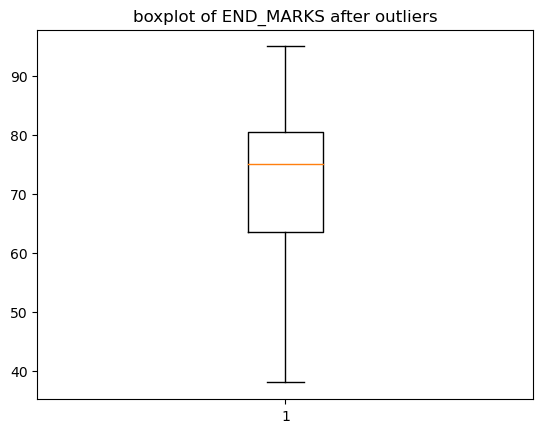

In [22]:
for i in range(2,len(x)):
    plt.boxplot(data[x[i]])
    plt.title(f'boxplot of {x[i]} after outliers')
    plt.show()

In [36]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLL_NO            127 non-null    object 
 1   GENDER             127 non-null    int8   
 2   MID_MARKS          127 non-null    float64
 3   ATTENDANCE         127 non-null    float64
 4   SOCIAL_MEDIA_TIME  127 non-null    float64
 5   STUDY_TIME         127 non-null    float64
 6   END_MARKS          127 non-null    int64  
dtypes: float64(4), int64(1), int8(1), object(1)
memory usage: 11.1+ KB
None


,ROLL_NO,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME,END_MARKS
0,CS20B1052,1,23.0,90.32,5.0,3.0,55
1,CS21B1001,0,21.0,93.65,4.7,3.1,56
2,CS21B1002,1,38.0,98.41,2.0,7.2,95
3,CS21B1003,1,14.0,95.24,5.2,2.0,41
4,CS21B1004,1,13.0,85.71,6.0,1.8,39


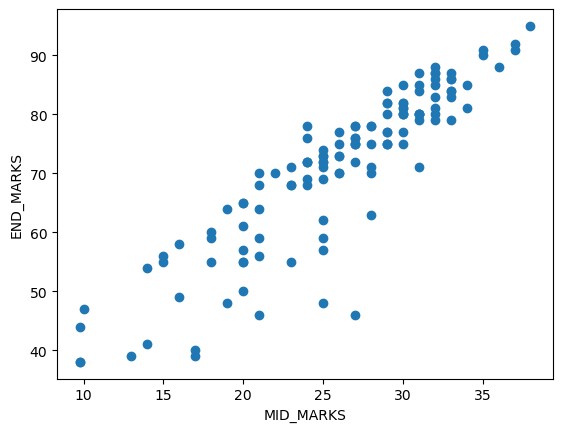

In [58]:
plt.scatter(data['MID_MARKS'],data['END_MARKS'])
plt.xlabel('MID_MARKS')
plt.ylabel('END_MARKS')
plt.show()

In [39]:
x=data.drop(columns=['ROLL_NO','END_MARKS'])
y=data['END_MARKS']
x.corr()

,GENDER,MID_MARKS,ATTENDANCE,SOCIAL_MEDIA_TIME,STUDY_TIME
GENDER,1.000000,-0.054196,0.009743,0.109538,-0.013341
MID_MARKS,-0.054196,1.000000,0.414397,-0.831826,0.822913
ATTENDANCE,0.009743,0.414397,1.000000,-0.418391,0.383066
SOCIAL_MEDIA_TIME,0.109538,-0.831826,-0.418391,1.000000,-0.840771
STUDY_TIME,-0.013341,0.822913,0.383066,-0.840771,1.000000


In [27]:
#as we see gender is a not at all related to other variables and we see its categorical data we can drop that too
x=x.drop(columns=['GENDER'])

In [28]:
x.insert(0,'mlr',1)

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
Xt=xtrain.transpose()
Xt=np.array(Xt)
k=np.matmul(Xt,xtrain)
k=np.linalg.inv(k)
k=np.matmul(k,Xt)
k=np.matmul(k,ytrain)
k

array([37.08488023,  0.79406859,  0.07201609, -3.04662227,  3.62110146])

In [32]:
def predict(k,a):
    s=0
    for i in range(len(k)):
        s=s+k[i]*a[i]
    return s
ypred=[]
for i in range(len(xtest)):
    c=predict(k,xtest.iloc[i])
    ypred.append(c)
print(ypred)
print('\n')
print('mean absolute error : ',sum(abs(ypred-ytest))/len(ytest))

[70.89343954670936, 82.98771519814488, 85.10175739159075, 85.1789091224453, 71.63932926996887, 76.3373394017295, 93.77842182957131, 74.24260063973003, 83.01919159609231, 67.72500825985122, 78.0147911546396, 41.81852002574325, 58.40308816014323, 67.54845056162473, 72.48888016053833, 81.34950822444044, 56.25473862190541, 58.7335623984523, 71.03367911553008, 78.19254741994793, 82.10370424394395, 74.99838214794191, 72.18421793356427, 79.05301741953265, 57.48314413066008, 65.20940140608488]


mean absolute error :  2.778099435484366


In [33]:
#r2 score
val=ytest.values
ymean=ytest.mean()
s=0
num=sum([(val[i]-ypred[i])**2 for i in range(len(val))])
den=sum([(val[i]-ymean)**2 for i  in range(len(val))])
# An R2 score of 0.9 means that 90% of the variance in the dependent variable
# is explained by the independent variables.
print('r2 score is ',1-num/den)

r2 score is  0.9071468706326603


In [54]:
def pca(n,data):
    x=data.drop(columns=['ROLL_NO','END_MARKS','GENDER'])
    y=data['END_MARKS']
    x=(x-x.mean())/x.std()
    f=x.cov()
    from numpy.linalg import eig
    ev=eig(f)
    evctr=ev[1]
    fv=evctr[:,0:n]
    final_x=np.dot(x,fv)
    if n==1:
        x=pd.DataFrame(final_x,columns=['f1'])
    elif n==2:
        x=pd.DataFrame(final_x,columns=['f1','f2'])
    elif n==3:
        x=pd.DataFrame(final_x,columns=['f1','f2','f3'])
    x.insert(0,'grb',1)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
    def predict(k,a):
        s=0
        for i in range(len(k)):
            s=s+k[i]*a[i]
        return s
    Xt=xtrain.transpose()
    Xt=np.array(Xt)
    k=np.matmul(Xt,xtrain)
    k=np.linalg.inv(k)
    k=np.matmul(k,Xt)
    k=np.matmul(k,ytrain)
    ypred=[]
    for i in range(len(xtest)):
        c=predict(k,xtest.iloc[i])
        ypred.append(c)
    print(f"n=={n}")
    print('mean absolute error : ',sum(abs(ypred-ytest))/len(ytest))
    #r2 score
    val=ytest.values
    ymean=ytest.mean()
    s=0
    num=sum([(val[i]-ypred[i])**2 for i in range(len(val))])
    den=sum([(val[i]-ymean)**2 for i  in range(len(val))])
    # An R2 score of 0.9 means that 90% of the variance in the dependent variable
    # is explained by the independent variable.
    print('r2 score for  is    : ',1-num/den)
    print('\n')

In [55]:
pca(1,data)
pca(2,data)
pca(3,data)
pca(4,data)

n==1
mean absolute error :  3.168249286214192
r2 score for  is    :  0.8880679036136152


n==2
mean absolute error :  2.744614563809676
r2 score for  is    :  0.9130494020693747


n==3
mean absolute error :  2.766960962038745
r2 score for  is    :  0.9096449809551459


n==4
mean absolute error :  2.7780994354842155
r2 score for  is    :  0.9071468706326652


